In [18]:
import pandas as pd

houses_05_mar = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)

In [19]:
houses_05_mar.head()

,Unnamed: 0,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,0,452600.0,8.3252,41.0,880.0,129.0,NaN,126.0,37.88,-122.23
1,1,358500.0,8.3014,21.0,7099.0,1106.0,NaN,1138.0,37.86,-122.22
2,2,352100.0,7.2574,52.0,1467.0,190.0,NaN,177.0,37.85,-122.24
3,3,341300.0,5.6431,52.0,1274.0,235.0,NaN,219.0,37.85,-122.25
4,4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


In [20]:
houses_05_mar.describe()

,Unnamed: 0,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,10320.000000,10320.000000,20640.000000,20640.000000,10320.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,206855.816909,3.940372,27.649128,2635.763081,537.898014,1352.802229,499.539680,35.631861,-119.569704
std,5958.399114,115395.615874,1.915848,13.294325,2181.615252,421.247906,1074.226167,382.329753,2.135952,2.003532
min,0.000000,14999.000000,0.499900,1.000000,2.000000,1.000000,5.000000,1.000000,32.540000,-124.350000
25%,5159.750000,119600.000000,2.603300,17.000000,1447.750000,295.000000,748.000000,280.000000,33.930000,-121.800000
50%,10319.500000,179700.000000,3.601950,26.000000,2127.000000,435.000000,1127.000000,409.000000,34.260000,-118.490000
75%,15479.250000,264725.000000,4.835600,37.000000,3148.000000,647.000000,1654.000000,605.000000,37.710000,-118.010000
max,20639.000000,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


In [21]:
houses_05_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   median_house_value  20640 non-null  float64
 2   median_income       10320 non-null  float64
 3   housing_median_age  10320 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20640 non-null  float64
 6   population          10320 non-null  float64
 7   households          20640 non-null  float64
 8   latitude            20640 non-null  float64
 9   longitude           20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


### Data Understanding

- When looking at the output of houses_05_mar.describe(), the population column clearly has missing values i.e. NaN's. 
- The count of median_income, housing_median_age, population is half the total number of data points there should be i.e. 20640 / 2 = 10320. Meaning half of the values are missing from the median_income, housing_median_age, population. This if confimred when I look at houses_05_mar.info().

- Note: Median house value shows a wide range of home prices from low 14,999 dollars to high 500,001 dollars. This wide range will be interesting to look into.


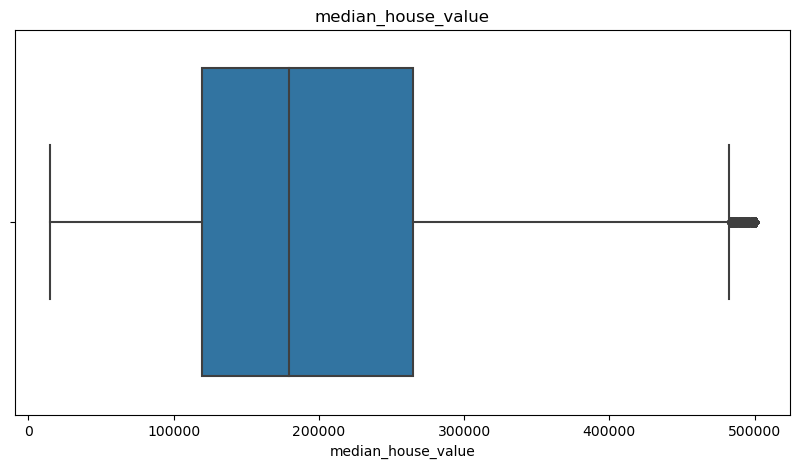

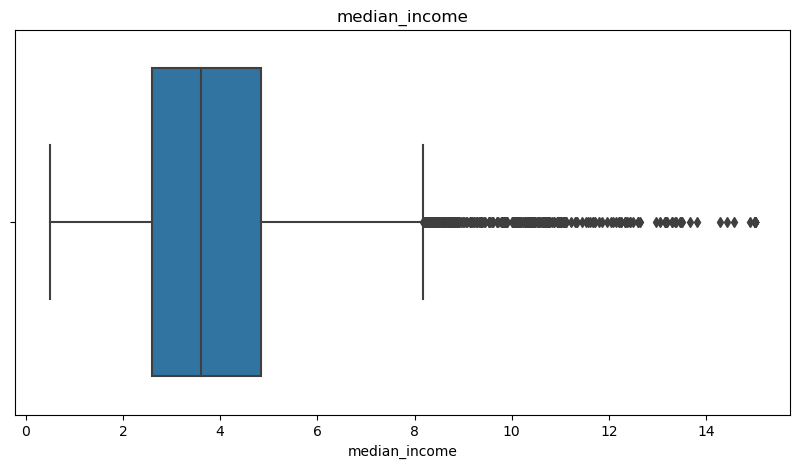

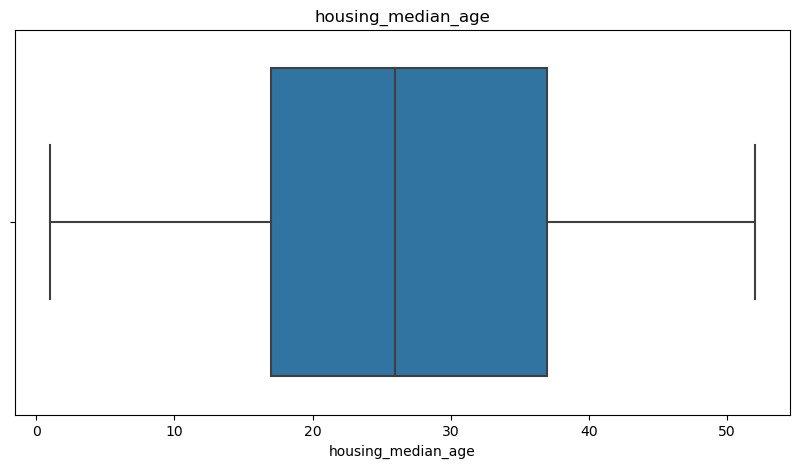

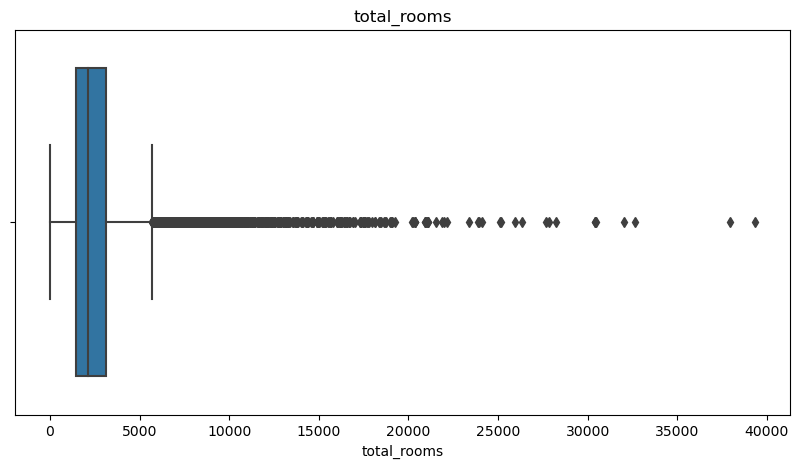

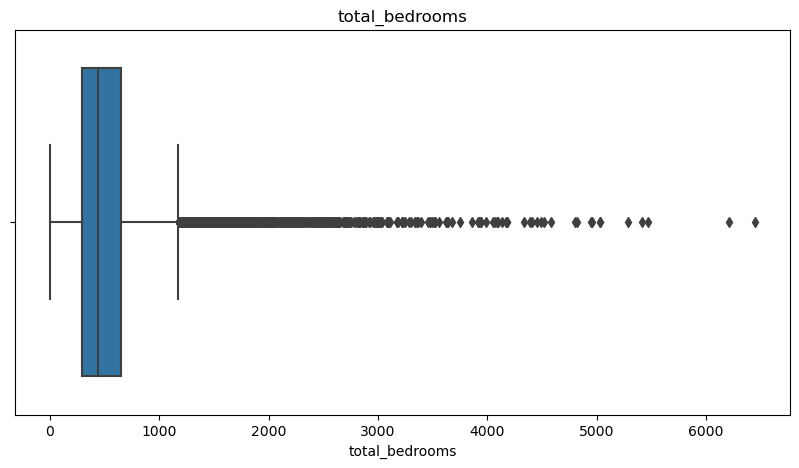

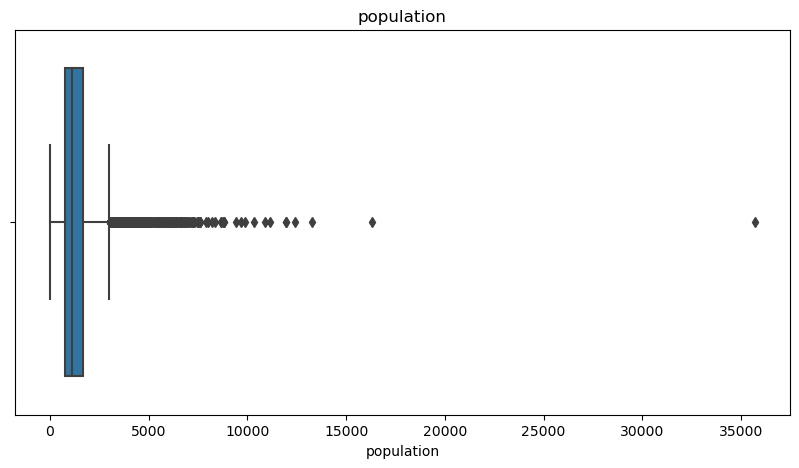

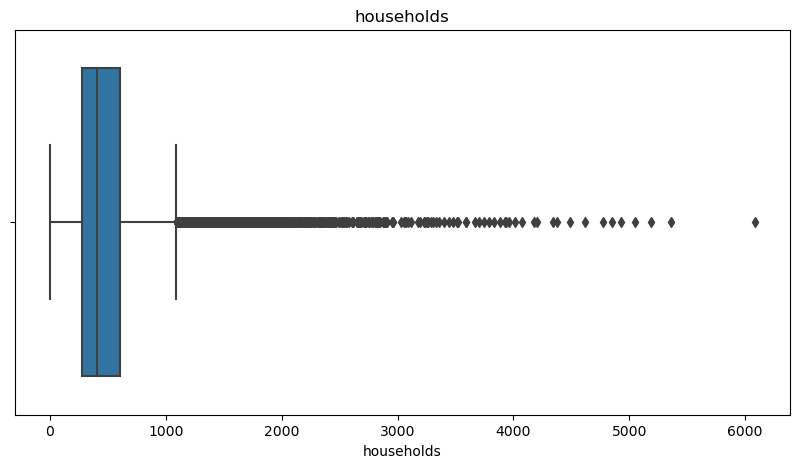

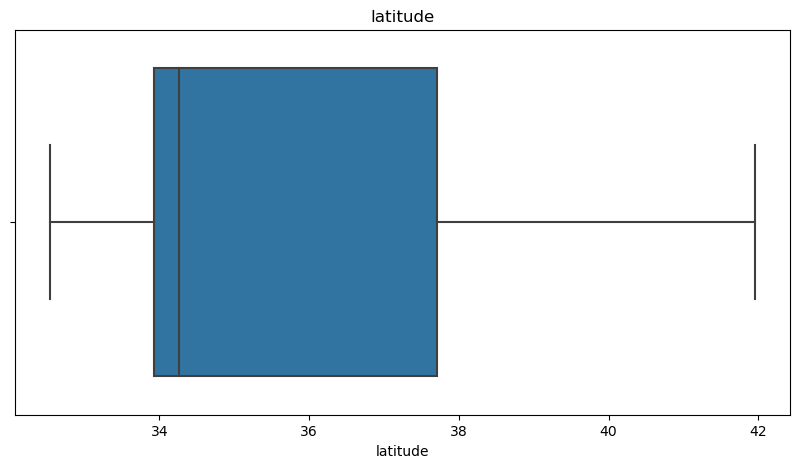

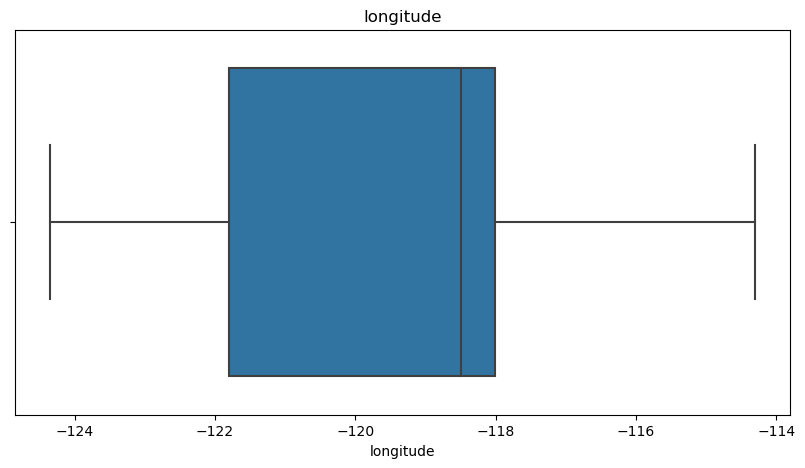

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# References:
# seaborn.pydata.org. (n.d.). seaborn.boxplot — seaborn 0.11.1 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.boxplot.html.

houses_05_mar = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)
houses_05_mar.drop('Unnamed: 0', axis=1, inplace=True)

# boxplot
for column in houses_05_mar.columns:
    plt.figure(figsize=(10, 5))  
    sns.boxplot(x=houses_05_mar[column])
    plt.title(f'{column}')
    plt.show()


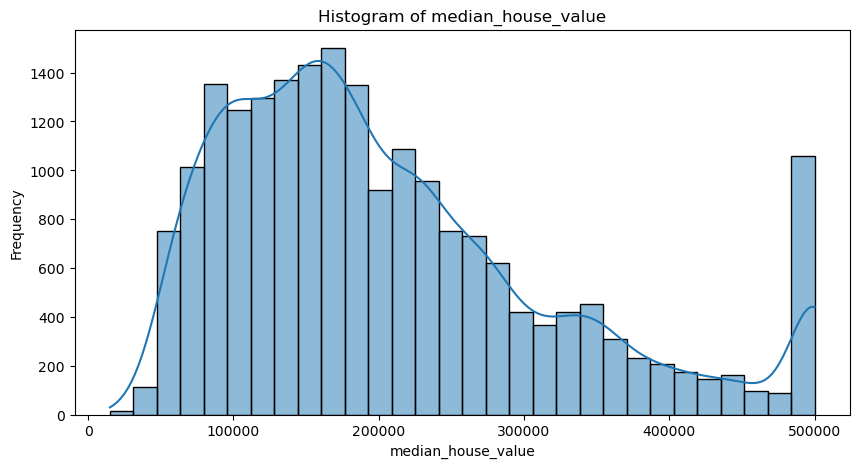

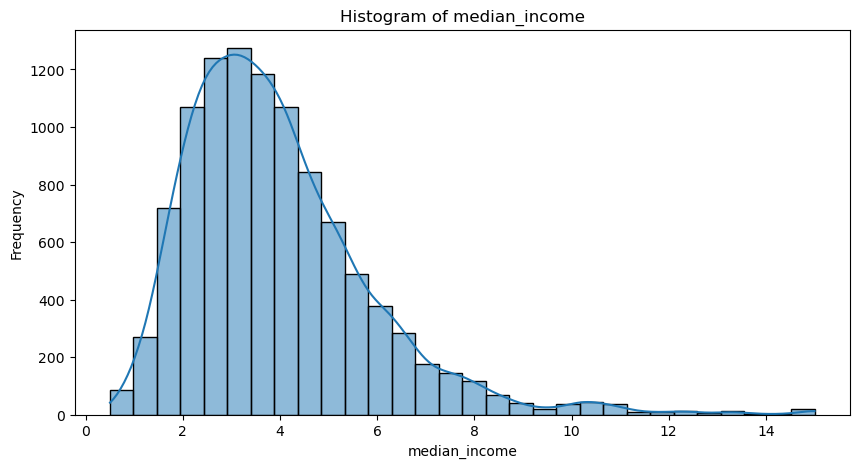

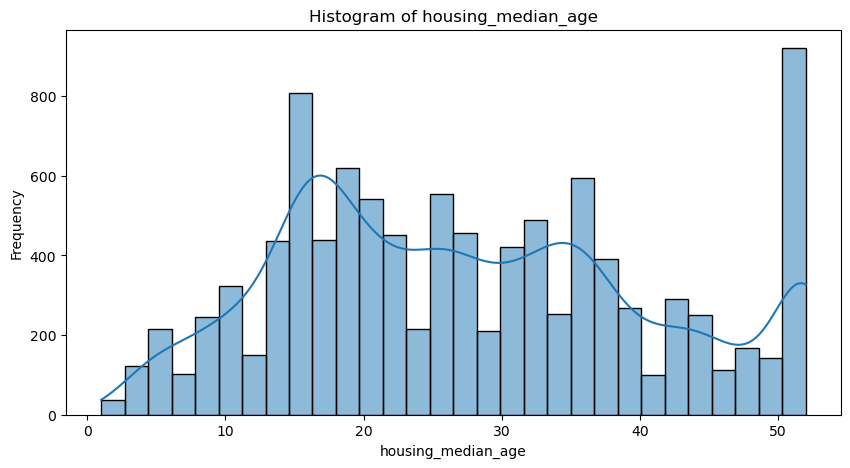

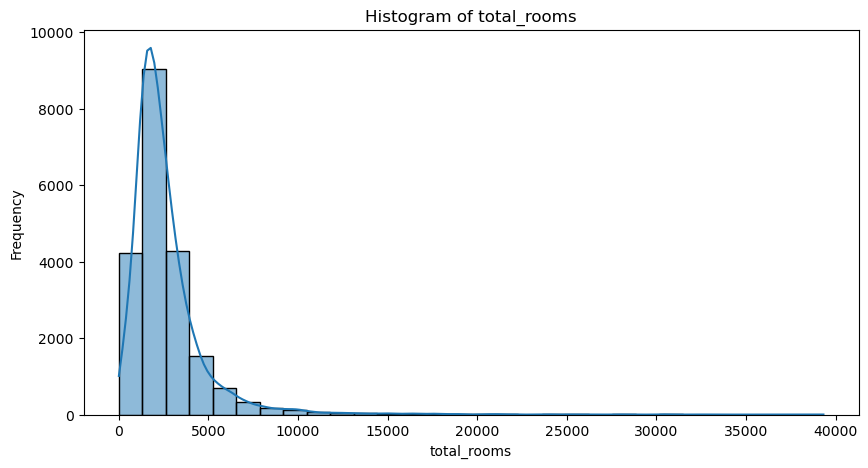

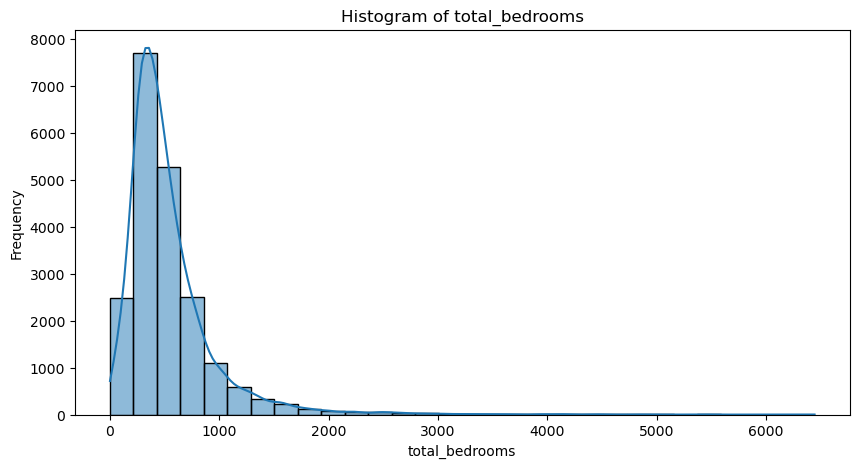

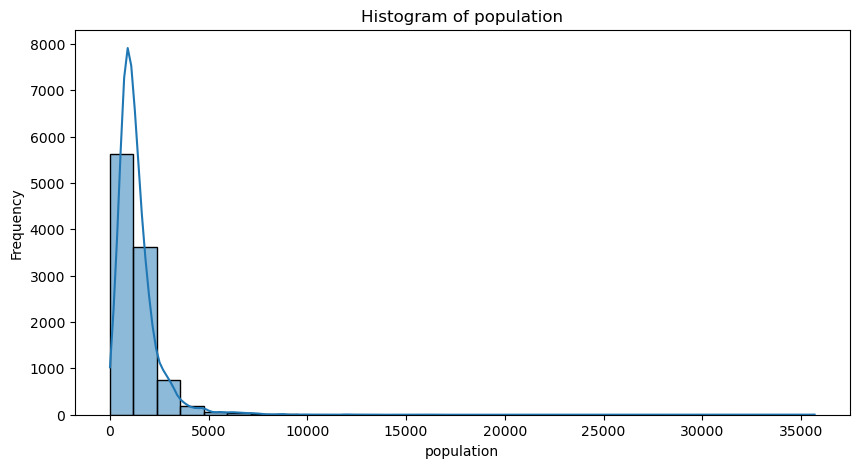

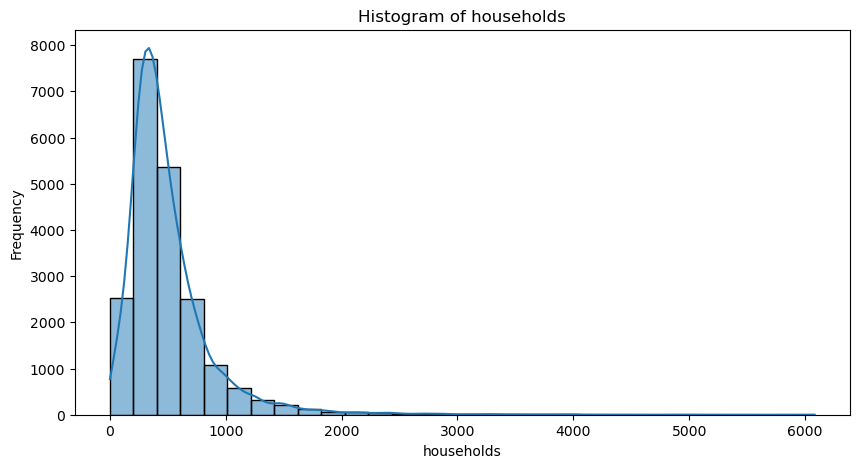

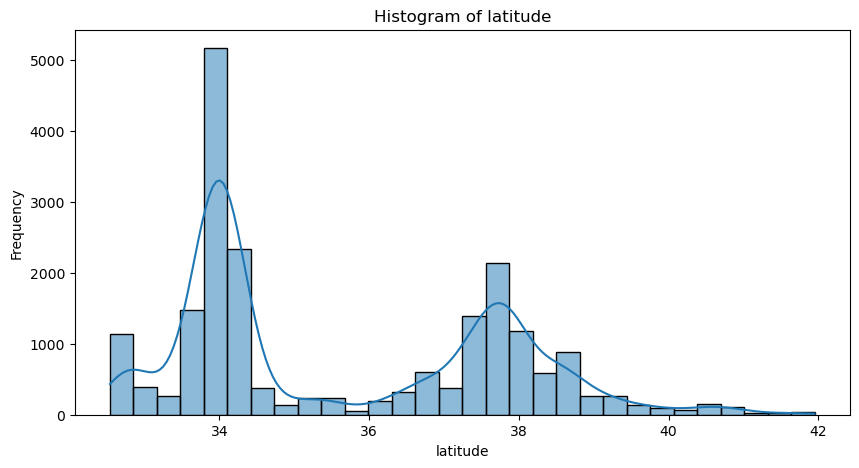

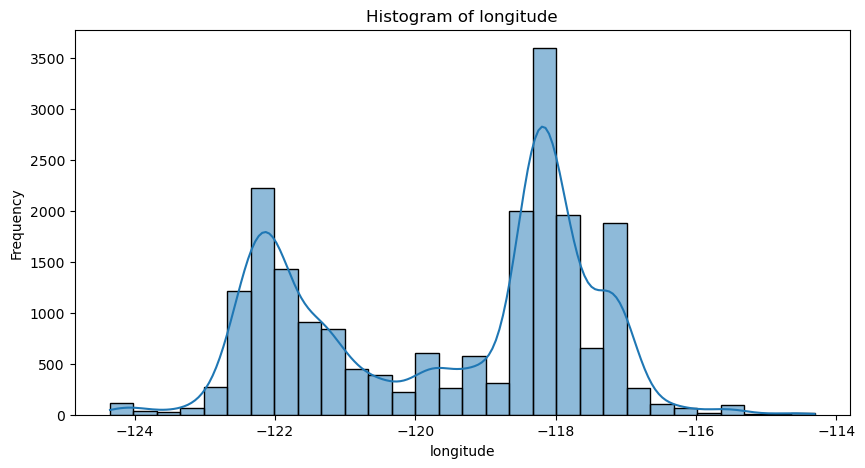

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# References:
# seaborn.pydata.org. (n.d.). seaborn.histplot — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.histplot.html.

houses_05_mar = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)
houses_05_mar.drop('Unnamed: 0', axis=1, inplace=True) # remove this index column

# histogram plot w/ KDE
for column in houses_05_mar.columns:
    plt.figure(figsize=(10, 5))  
    sns.histplot(houses_05_mar[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [24]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


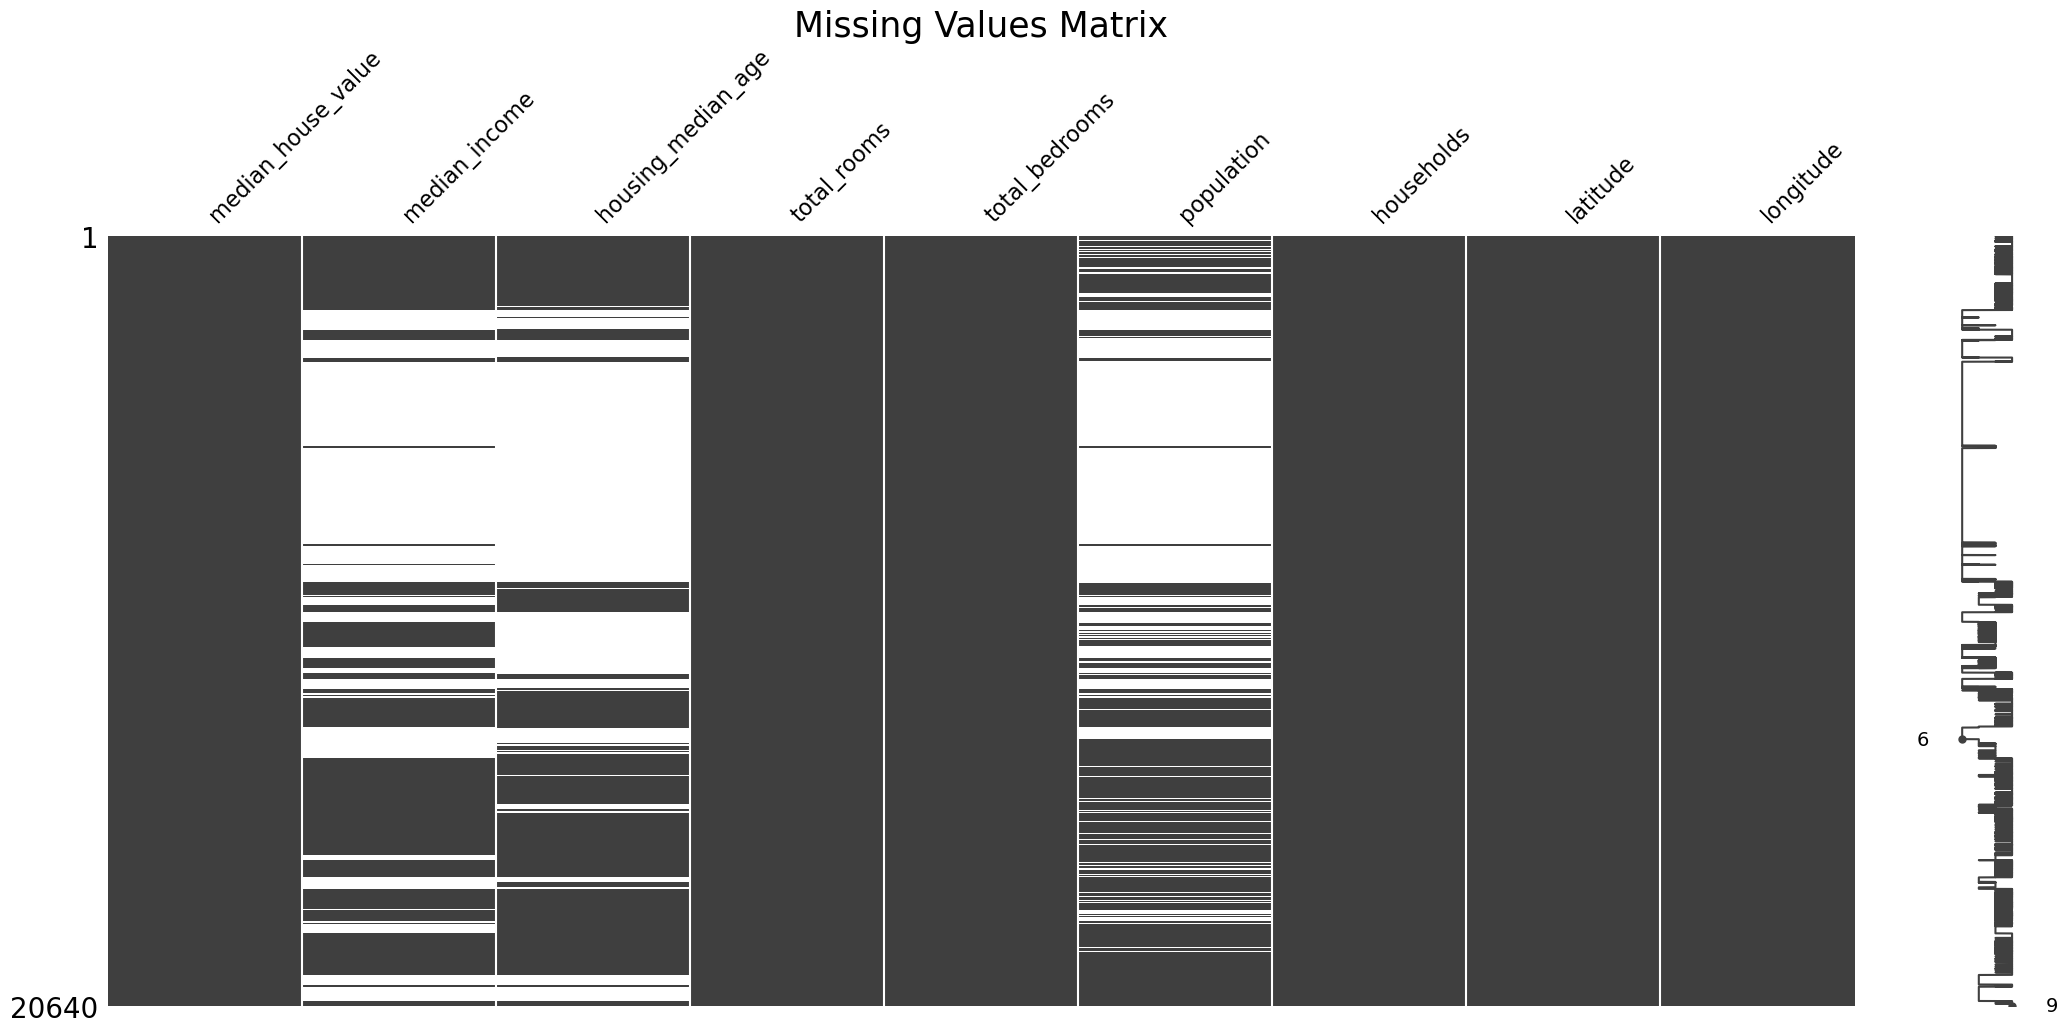

In [25]:
import missingno as msno
import matplotlib.pyplot as plt

# References:
# GitHub. (n.d.). CSC3831-2021-22/IMPUTATION/regression-example/Beer-imputation-example.ipynb at main · PaoloMissier/CSC3831-2021-22. [online] Available at: https://github.com/PaoloMissier/CSC3831-2021-22/blob/main/IMPUTATION/regression-example/Beer-imputation-example.ipynb
# kaggle.com. (n.d.). A Guide to Handling Missing values in Python. [online] Available at: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python/notebook.

msno.matrix(houses_05_mar)
plt.title("Missing Values Matrix", fontsize=25)
plt.show()


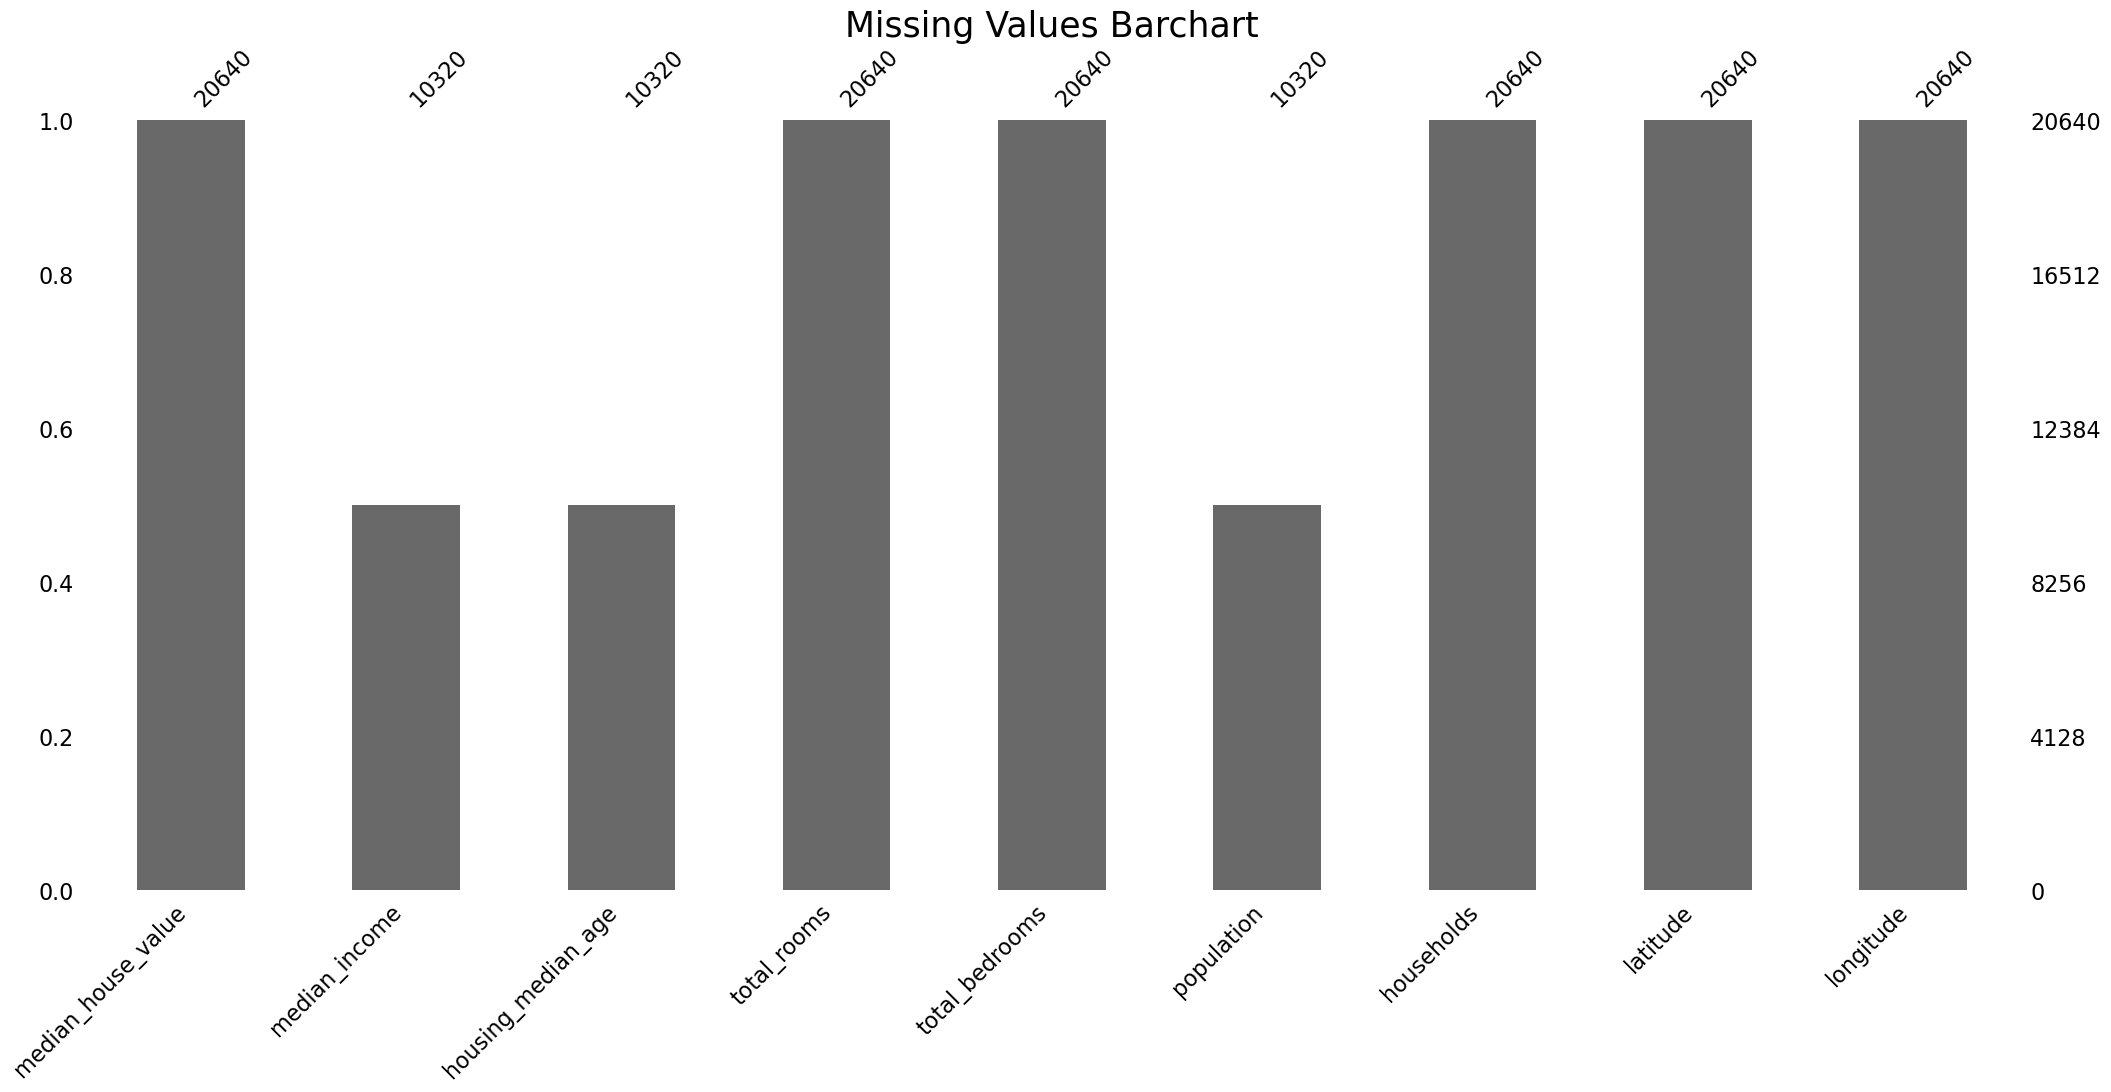

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno

msno.bar(houses_05_mar.sample(20640))
plt.title("Missing Values Barchart", fontsize=25)
plt.show()


<Axes: >

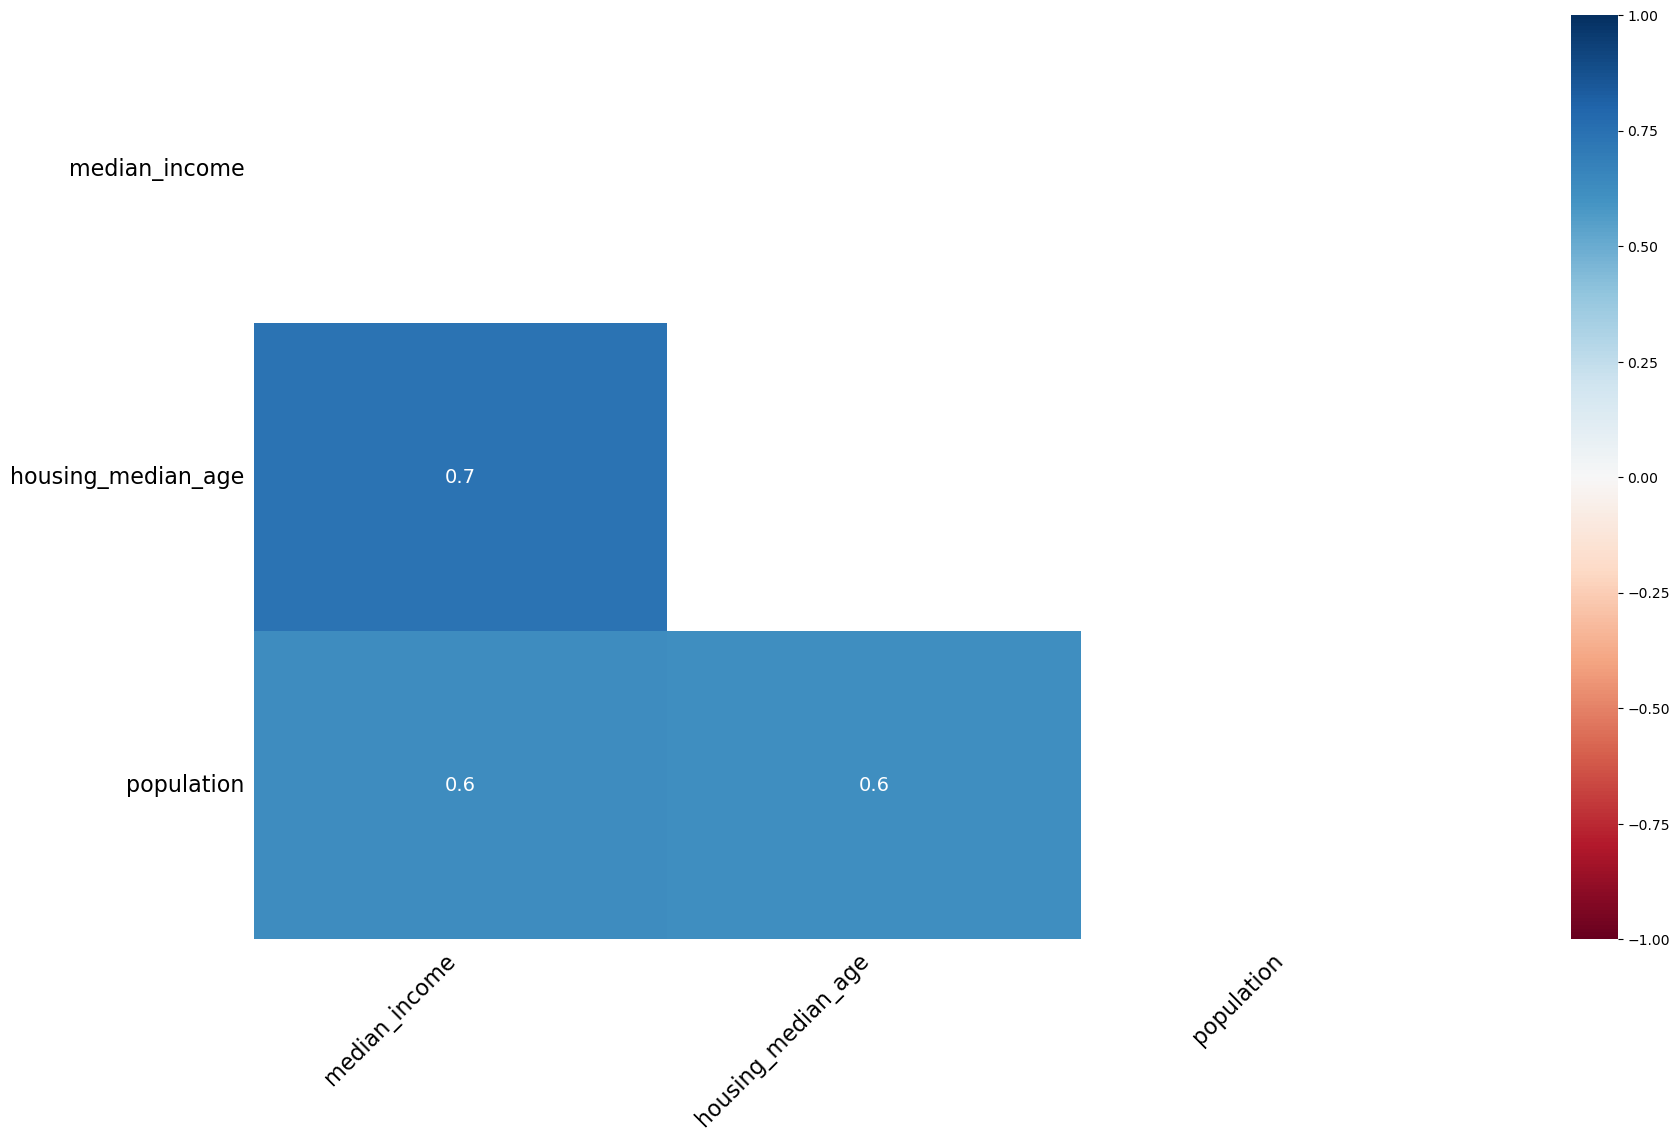

In [27]:
msno.heatmap(houses_05_mar)

### EDA

References:

- GeeksforGeeks. (2021). Exploratory Data Analysis (EDA) - Types and Tools. [online] Available at: https://www.geeksforgeeks.org/exploratory-data-analysis-eda-types-and-tools/.
- GitHub. (n.d.). CSC3831-2021-22/IMPUTATION/regression-example/Beer-imputation-example.ipynb at main · PaoloMissier/CSC3831-2021-22. [online] Available at: https://github.com/PaoloMissier/CSC3831-2021-22/blob/main/IMPUTATION/regression-example/Beer-imputation-example.ipynb 
- kaggle.com. (n.d.). A Guide to Handling Missing values in Python. [online] Available at: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python/notebook.


Boxplot:
- When looking at the boxplots all features are apart from housing_median_age, longitude and latitude have noticeable outliers, with median_house_value having the the smallest number of outliers out of the features with outliers.

Histogram:
- For median_house_value 100,000 - 200,000 was the peak.
- For median_income seems to be grouped around the lower income.
- For housing_median_age the histogram shows a varied distribution. Most houses seem to be near the older end as it peaks near the end. 
- For total_rooms the histogram shows there are a small number of rooms in most houses.
- For total_bedrooms it shows most houses have a smaller numberof bedrooms.
- For population it shows most areas have a low population.
- For households it shows most areas have fewer number of households.


Missing Values Matrix and Bar Chart:
- The bar chart and matrix for missing values confirms median_income, housing_median_age and population are the features with missing values.

- The heatmap shows correlations between missing data.
- From the heat map of missing values it shows that there are quite strong positive correlations between hosuing_median_age and median_income, 0.7, and population also seems to have pretty high positive correlations between median_income and housing_median_age aswell i.e 0.6.

Since the values with a significant number of missing values are median_income, housing_median_age and population I will chose these for imputation.



### KNN Imputation

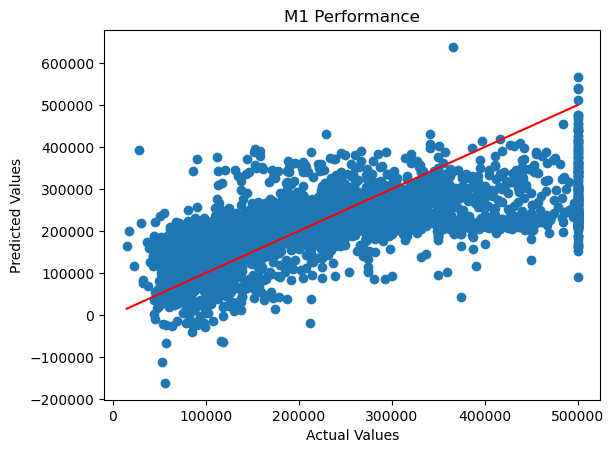

MAE: 65758.19753411779
MSE: 7795140400.44785
R^2 Score: 0.4051368290446171


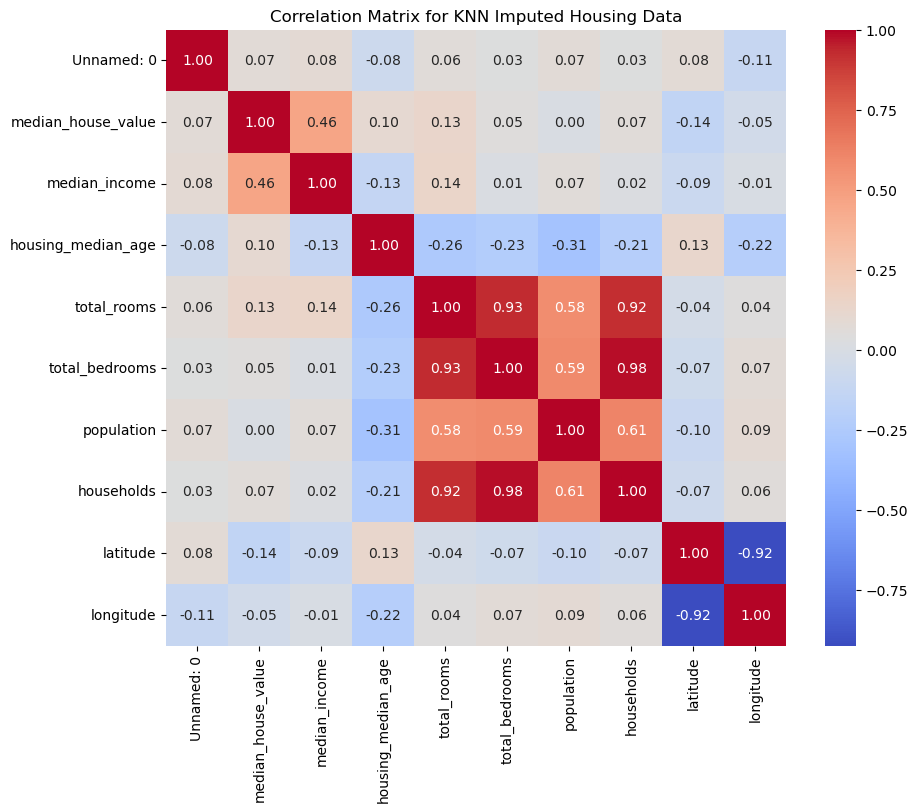

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# References:
# canvas.ncl.ac.uk. (n.d.). Newcastle University - Canvas Login. [online] Available at: https://ncl.instructure.com/courses/50010/pages/lecture-2-linear-regression?module_item_id=2960573.
# canvas.ncl.ac.uk. (n.d.). Newcastle University - Canvas Login. [online] Available at: https://ncl.instructure.com/courses/50010/pages/lecture-1-background?module_item_id=2960569 -> mse, r2

houses_05_mar = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)

columns_to_impute = ['median_income', 'housing_median_age', 'population']
imputer = KNNImputer(n_neighbors=25) # Initialise imputer
houses_05_mar[columns_to_impute] = imputer.fit_transform(houses_05_mar[columns_to_impute])

X = houses_05_mar.drop('median_house_value', axis=1) 
y = houses_05_mar['median_house_value'] 

# split data - training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialise regression model
model_M1 = LinearRegression()
model_M1.fit(X_train, y_train)

# predict values & evaluate the model
y_pred = model_M1.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')# line of best fit
plt.title('M1 Performance')
plt.show()

# print the performance metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2 Score: {r2}')

# heat map
corr_matrix = houses_05_mar.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for KNN Imputed Housing Data')
plt.show()



### KNN Results

- Answer the following:
    - Assess how well M1 performs using graphical and statistical methods
    - Comment on this performance in text providing rationale as to performance

Graphical:
- The scatter plot shows the relationship between actual and predicted median house values. The red line is what you'd expect if the predictions were correct every time.

- The distribution of the points around the line, you can see quite a bit of variation in what the model comes up with. The predictions are widespread. Furthermore the expensive houses have a very wise spread in the model, showing potential inaccuracies in the model.

- Furtheremore, the houses have negative values on the scatter plot which is not possible showing inaccuracies.

Statistical:
- The mean squared error comes to 7.8 billion. This indicates the model's predicted prices are off by a few million dollars.

- The mean absolute error is 66000. MAE is less sensitive to outliers and provides a clearer indicator of prediction accuracy.

- The R-squared score is 0.405. Meaning only 40.5% of the actual price movements are shown by the model's predictions. Therefore, it leaves a lot of the variance unexplained. Ideally I would want the percentage to be way  closer to 100% for the model to reliably predict selling prices.

Performance:

- From the results above, I'd say this model's performance is fine but not necessarily the best. The R-squared shows it's picking up on some relationships in the housing data, but still needs improvement. The high mean squared error implies the predictions can miss by millions, especially more valuable ones as seen on the scatter plot. Eventhough the the mean aboslute error does better than mean square error it is not necessarily the best for median house value as its still 66000 units off from actual values i.e. off by 66000 dollars. 

- Reducing those errors and getting the R-squared closer to 1 would help. But the high variation and issues with expensive houses make me reluctant to use the model.


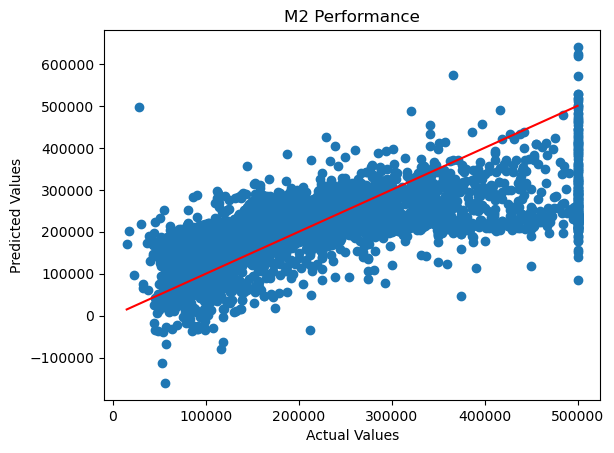

MAE: 64792.31598388631
MSE: 7515940279.564584
R^2 Score: 0.4264431635950767


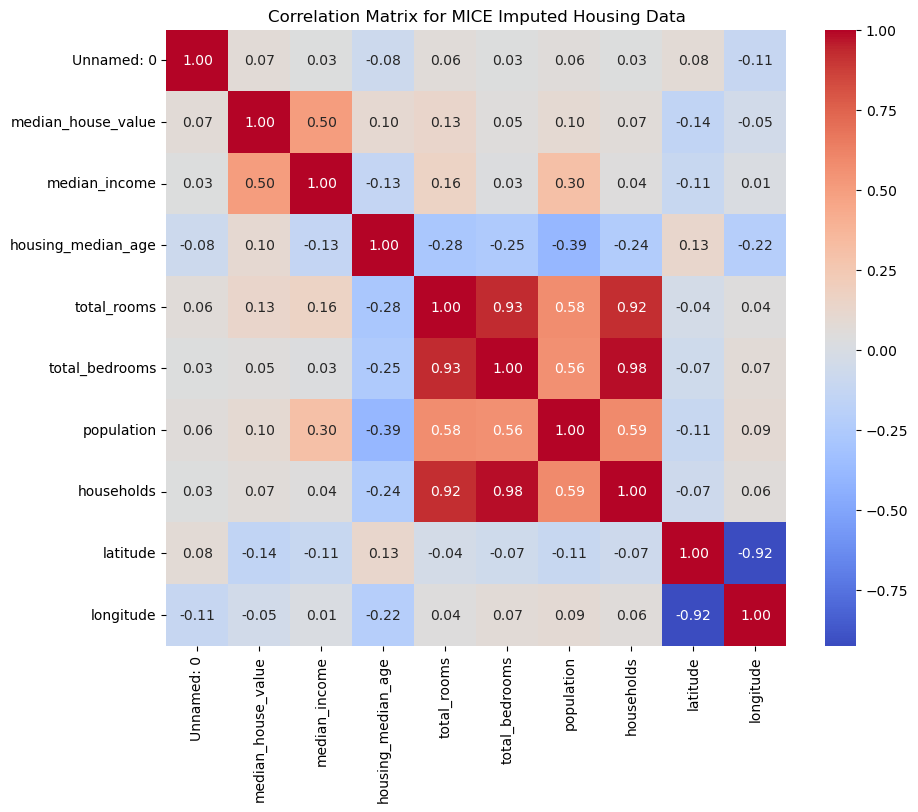

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# References:
# canvas.ncl.ac.uk. (n.d.). Newcastle University - Canvas Login. [online] Available at: https://ncl.instructure.com/courses/50010/pages/lecture-2-linear-regression?module_item_id=2960573.
# canvas.ncl.ac.uk. (n.d.). Newcastle University - Canvas Login. [online] Available at: https://ncl.instructure.com/courses/50010/pages/lecture-1-background?module_item_id=2960569

houses_05_mar = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)

columns_to_impute = ['median_income', 'housing_median_age', 'population']
mice_imputer = IterativeImputer()
houses_05_mar[columns_to_impute] = mice_imputer.fit_transform(houses_05_mar[columns_to_impute])

X = houses_05_mar.drop('median_house_value', axis=1) 
y = houses_05_mar['median_house_value']                

# split data - training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialise regression model
model_M2 = LinearRegression()
model_M2.fit(X_train, y_train)

# predict values & evaluate the model
y_pred = model_M2.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('M2 Performance')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect predictions
plt.show()

# print the performance metrics
print(f'MAE: {mae}') 
print(f'MSE: {mse}')
print(f'R^2 Score: {r2}')

# heat map
corr_matrix = houses_05_mar.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for MICE Imputed Housing Data')
plt.show()


### MICE Results

- Assess how well M2 performs using graphical and statistical methods
- Comment on this performance in text providing rationale as to performance

Graphical:
- The scatterplot for the new Model 2 looks similar to Model 1. Data points are pretty scattered  around the ideal red line. And the spread seems to get wider the more expensive the house is, so there's still an issue with accuracy for expensive homes. 

- Model 2 is better than model one when it comes to negative values as it predicts less negative values. 

Statistical:

- The average error did go down a little bit to 65,000 dollars for Model 2. Better than the 66000 dollars from Model 1, but still there's room for improvement.

- The mean squared error reduced aswell, from 7.8 billion down to 7.5 billion. Better but that number is still large.

- The R-squared went up slightly, from 0.405 to 0.426. A slight improvement.

Performance:

- From the results above it's evident Model 2 is better, but not by alot. The errors are a bit smaller, and it shows more relationships with that higher R-squared. Meaning the imputation method, i.e. MICE, may be slightly better for model 2.


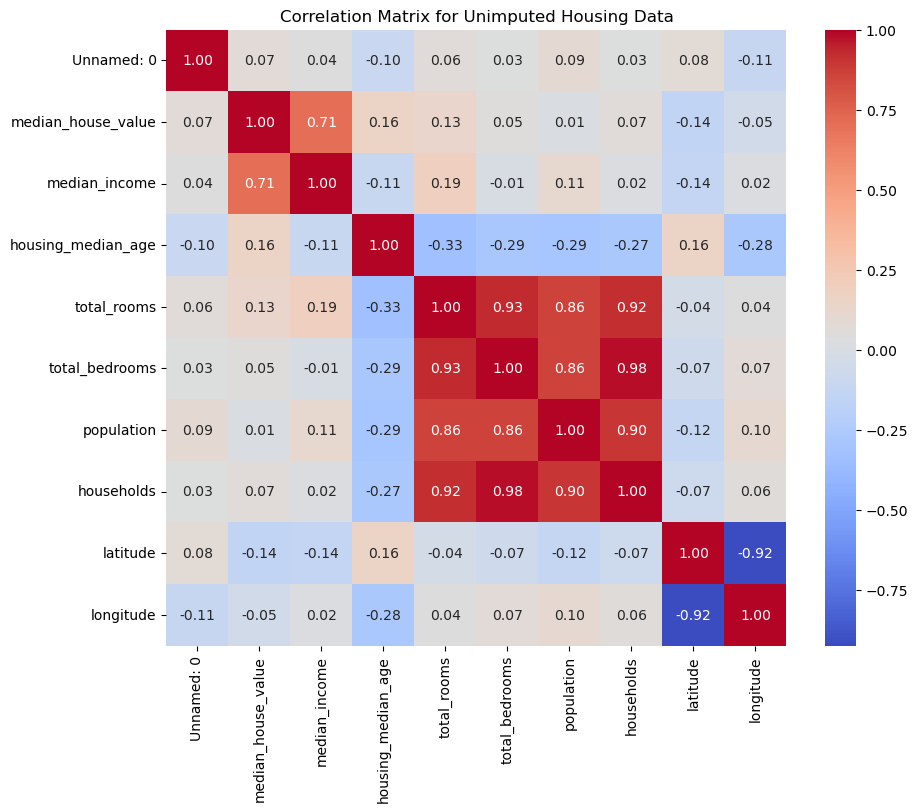

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

houses_05_mar = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)

# heat map
corr_matrix = houses_05_mar.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Unimputed Housing Data')
plt.show()

### Final Comparison

- As stated above from the results it's obvious Model 2 is better, but not by much. As it has slight improvements in its MAE, MSE and R^2 score. 

Why MICE Might Be Better?

- KNN fills in missing data based on the nearest neighbors as it works assuming similar data points can be found  nearby in the dataset. So if the data is are organised well with a clear structure KNN works fine. But it doesn't deal well with complex data.

- MICE, i.e. Iterative Imputer, looks at each feature with missing values, and gets the other features together to make predictions about what those values should be. For example, by looking at relationships between bedroom count, location, size, etc, it can make more accurate guesses on what a houses value should be. For example, if bedrooms is missing for a house, it checks location, size, etc. and uses that information to predict, i.e., 'I assumes it's a 3-bedroom.' It's more sophisticated than KNN.

Insights:
- The stats give MICE a slight edge across the board. My guess is it better handles how interconnected housing features are. KNN misses that nuance. 

- The negative with MICE is its more computationally intense. So if I was crunching numbers on millions of homes, maybe KNN would be a suffient choice to get a foundational model fast.

- But I would focus more an accuracy as that's important when talking about pricing models. For really squeezing accuracy out of the dataset, it seems MICE is the best option.

References:
- Analytics Vidhya. (2020). KNNImputer | Way To Impute Missing Values. [online] Available at: https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/.
- scikit-learn.org. (n.d.). 6.4. Imputation of missing values — scikit-learn 0.22.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/impute.html.
- canvas.ncl.ac.uk. (n.d.). Newcastle University - Canvas Login. [online] Available at: https://ncl.instructure.com/courses/50010/pages/lecture-3-data-imputation-02-slash-10?module_item_id=2908304 
